In [1]:
import requests
import pandas as pd
import os

# Define the API endpoint and query
base_url = "https://www.xeno-canto.org/api/2/recordings"
query = "penguin"  # Search for penguins
url = f"{base_url}?query={query}"

# Initialize variables
recordings = []
page = 1

# Fetch data until we have at least 20 recordings
while len(recordings) < 20:
    # Fetch data from the API with pagination
    response = requests.get(f"{url}&page={page}")
    if response.status_code == 200:
        data = response.json()
        # Append recordings to the list
        recordings.extend(data.get("recordings", []))
        # If there are no more recordings, stop
        if len(data.get("recordings", [])) == 0:
            break
        page += 1
    else:
        print(f"Error: Unable to fetch data. Status code {response.status_code}")
        break

# Limit the list to 20 recordings
recordings = recordings[:20]

# Create a DataFrame
df = pd.DataFrame(recordings)

# Display the DataFrame
print(df[["gen", "sp", "en", "loc", "file"]])  # Display selected columns

# Save the dataset to a CSV file (optional)
df.to_csv("penguin_sounds.csv", index=False)

            gen           sp            en  \
0   Aptenodytes  patagonicus  King Penguin   
1   Aptenodytes  patagonicus  King Penguin   
2   Aptenodytes  patagonicus  King Penguin   
3   Aptenodytes  patagonicus  King Penguin   
4   Aptenodytes  patagonicus  King Penguin   
5   Aptenodytes  patagonicus  King Penguin   
6   Aptenodytes  patagonicus  King Penguin   
7   Aptenodytes  patagonicus  King Penguin   
8   Aptenodytes  patagonicus  King Penguin   
9   Aptenodytes  patagonicus  King Penguin   
10  Aptenodytes  patagonicus  King Penguin   
11  Aptenodytes  patagonicus  King Penguin   
12  Aptenodytes  patagonicus  King Penguin   
13  Aptenodytes  patagonicus  King Penguin   
14  Aptenodytes  patagonicus  King Penguin   
15  Aptenodytes  patagonicus  King Penguin   
16  Aptenodytes  patagonicus  King Penguin   
17  Aptenodytes  patagonicus  King Penguin   
18  Aptenodytes  patagonicus  King Penguin   
19  Aptenodytes  patagonicus  King Penguin   

                                 

In [2]:
# Download audio files (optional)
os.makedirs("penguin_sounds", exist_ok=True)
for i, recording in enumerate(recordings):
    audio_url = f"https:{recording['file']}"  # URL of the recording file
    species = recording['en'] or "unknown_species"  # Handle missing English names
    file_name = f"penguin_sounds/{species.replace(' ', '_')}_{i+1}.mp3"
    try:
        audio_response = requests.get(audio_url)
        with open(file_name, 'wb') as f:
            f.write(audio_response.content)
        print(f"Downloaded: {file_name}")
    except Exception as e:
        print(f"Failed to download {audio_url}: {e}")

Failed to download https:https://xeno-canto.org/879318/download: Invalid URL 'https:https://xeno-canto.org/879318/download': No host supplied
Failed to download https:https://xeno-canto.org/623802/download: Invalid URL 'https:https://xeno-canto.org/623802/download': No host supplied
Failed to download https:https://xeno-canto.org/449827/download: Invalid URL 'https:https://xeno-canto.org/449827/download': No host supplied
Failed to download https:https://xeno-canto.org/449826/download: Invalid URL 'https:https://xeno-canto.org/449826/download': No host supplied
Failed to download https:https://xeno-canto.org/449825/download: Invalid URL 'https:https://xeno-canto.org/449825/download': No host supplied
Failed to download https:https://xeno-canto.org/396250/download: Invalid URL 'https:https://xeno-canto.org/396250/download': No host supplied
Failed to download https:https://xeno-canto.org/396249/download: Invalid URL 'https:https://xeno-canto.org/396249/download': No host supplied
Failed

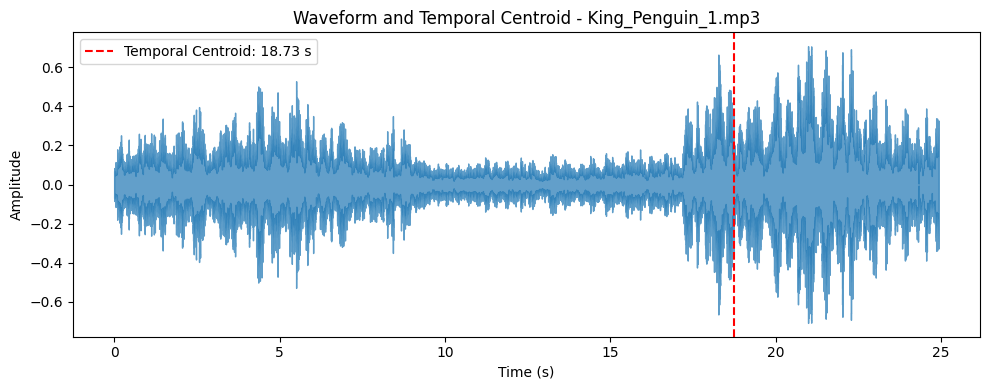

File: King_Penguin_1.mp3, Temporal Centroid: 18.73 seconds


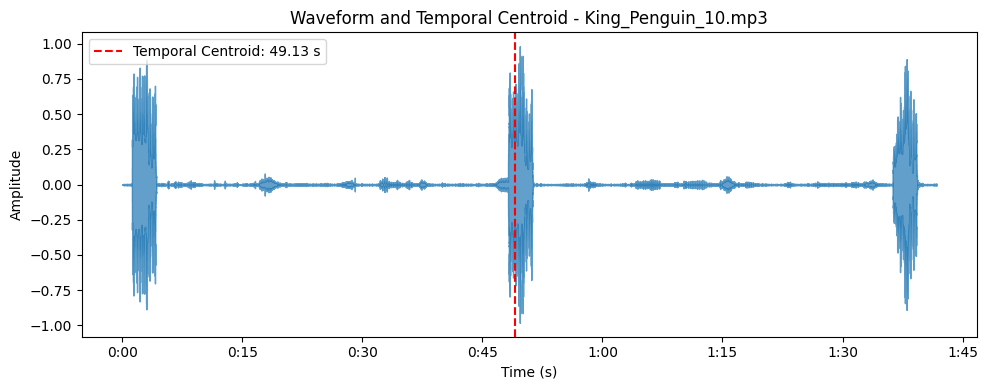

File: King_Penguin_10.mp3, Temporal Centroid: 49.13 seconds


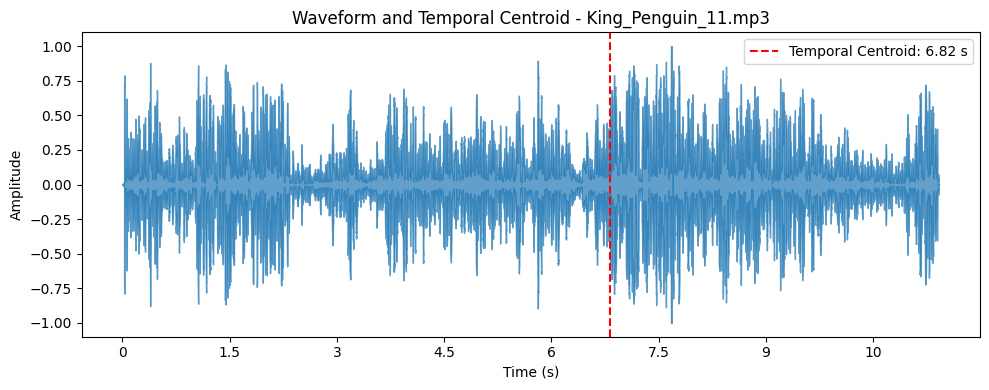

File: King_Penguin_11.mp3, Temporal Centroid: 6.82 seconds


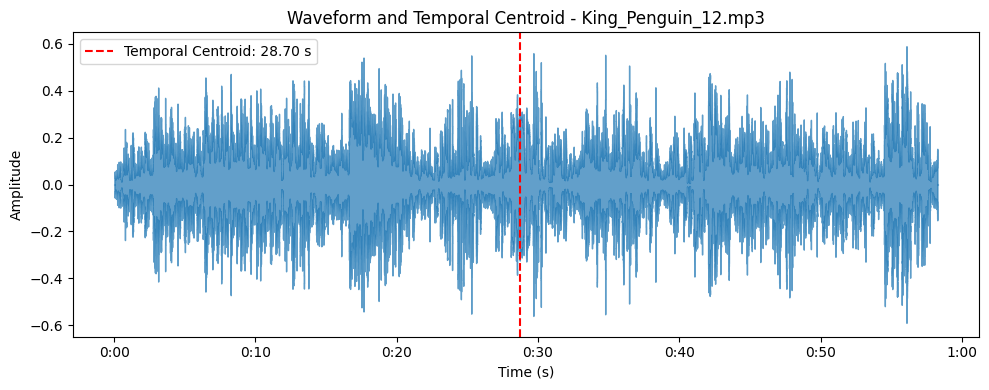

File: King_Penguin_12.mp3, Temporal Centroid: 28.70 seconds


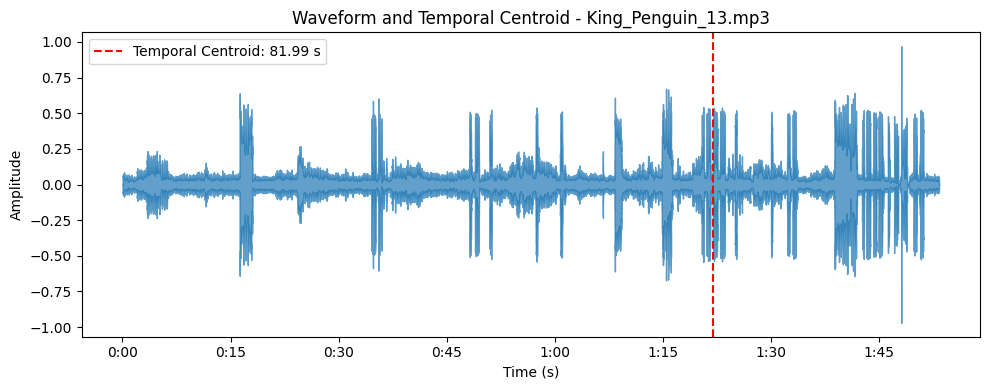

File: King_Penguin_13.mp3, Temporal Centroid: 81.99 seconds


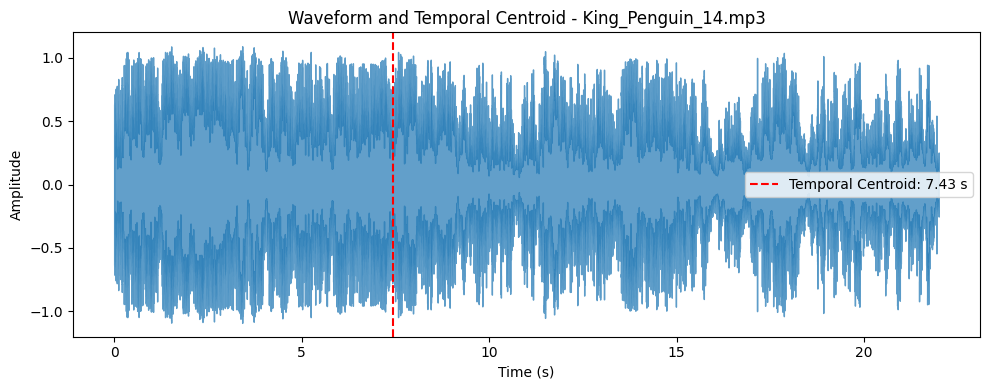

File: King_Penguin_14.mp3, Temporal Centroid: 7.43 seconds


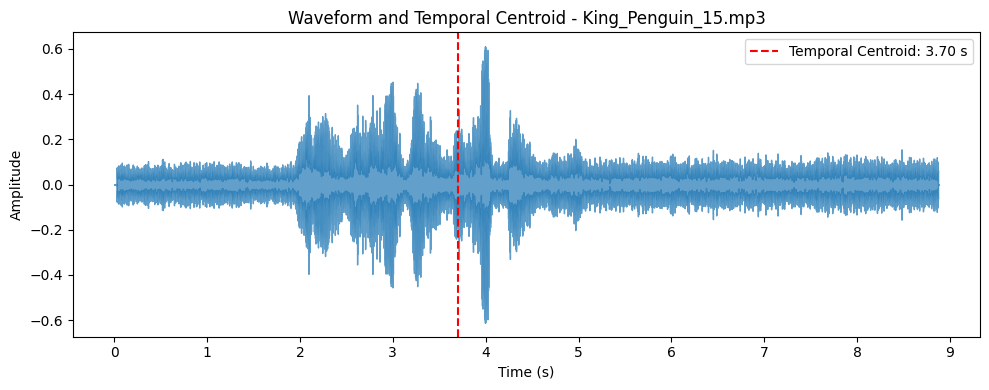

File: King_Penguin_15.mp3, Temporal Centroid: 3.70 seconds


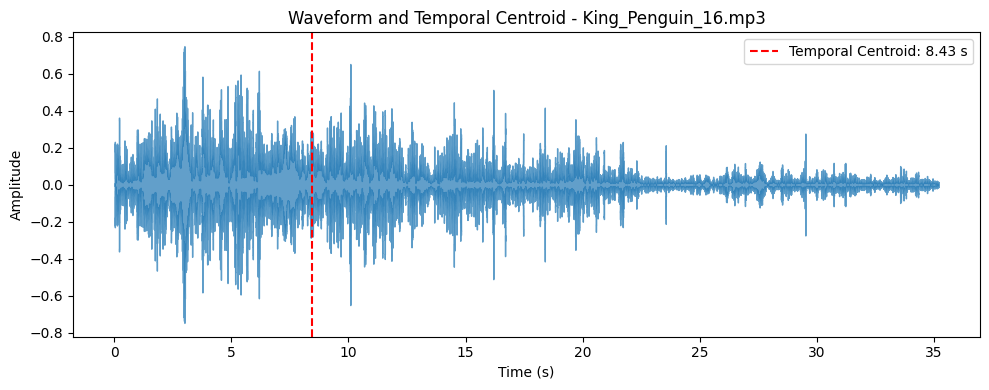

File: King_Penguin_16.mp3, Temporal Centroid: 8.43 seconds


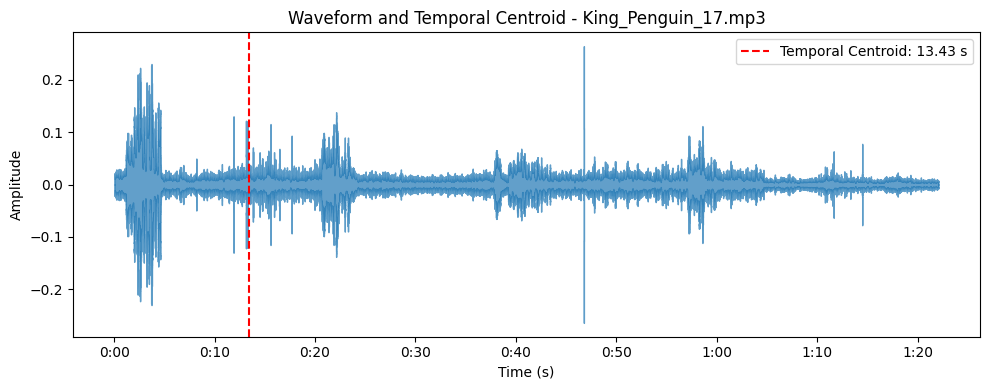

File: King_Penguin_17.mp3, Temporal Centroid: 13.43 seconds


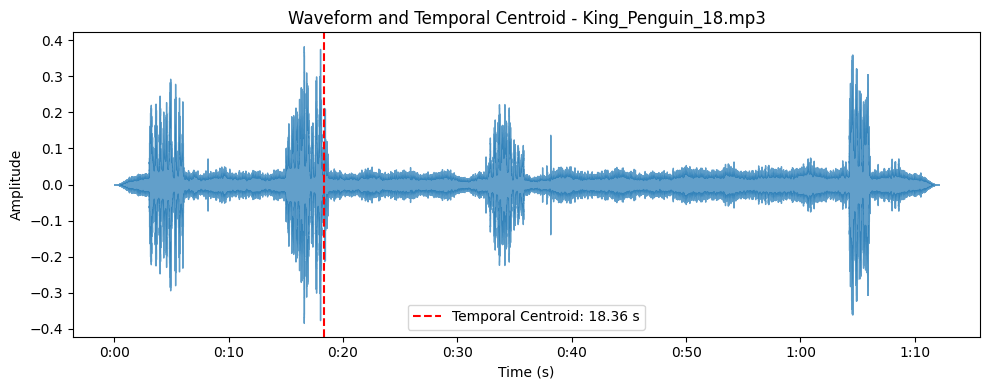

File: King_Penguin_18.mp3, Temporal Centroid: 18.36 seconds


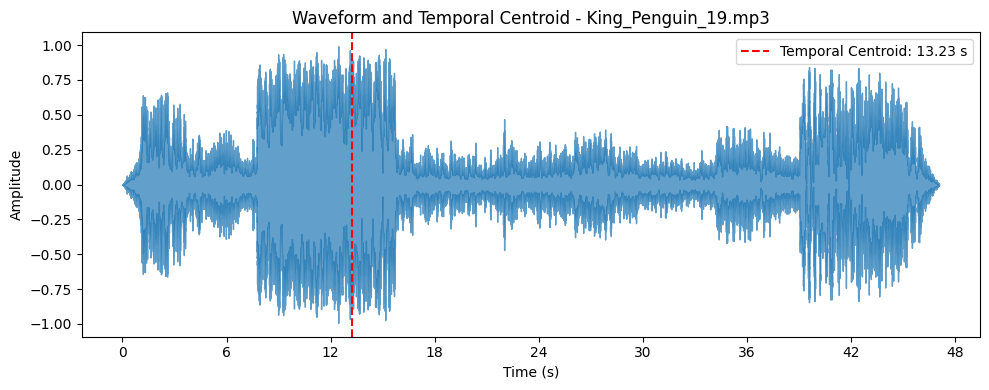

File: King_Penguin_19.mp3, Temporal Centroid: 13.23 seconds


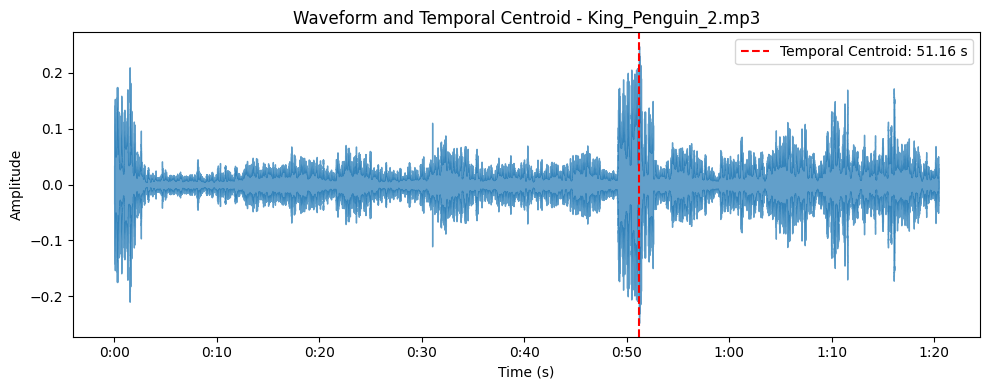

File: King_Penguin_2.mp3, Temporal Centroid: 51.16 seconds


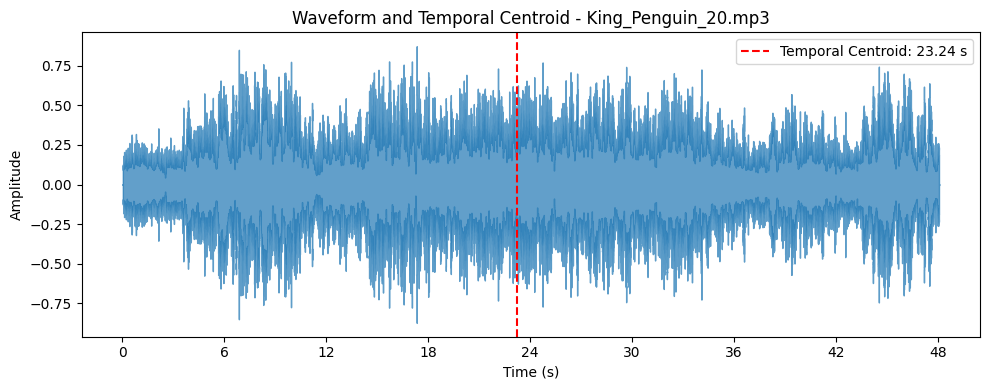

File: King_Penguin_20.mp3, Temporal Centroid: 23.24 seconds


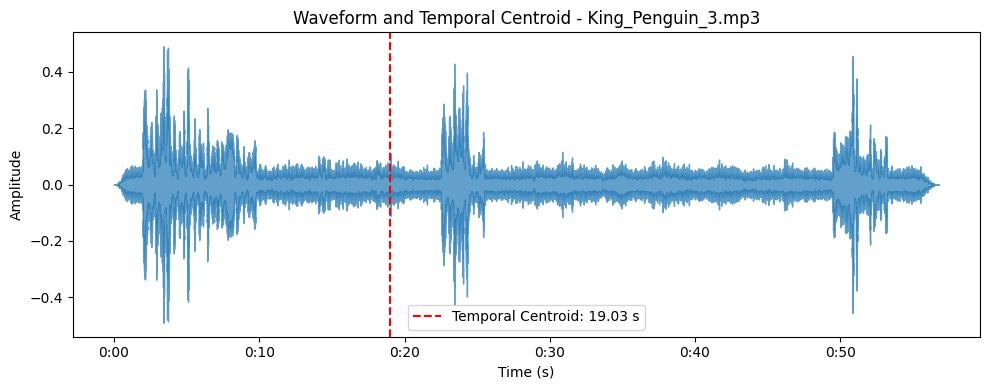

File: King_Penguin_3.mp3, Temporal Centroid: 19.03 seconds


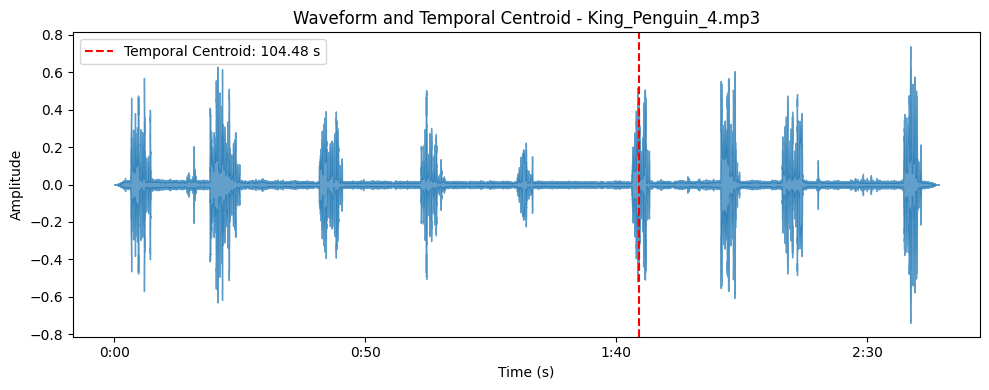

File: King_Penguin_4.mp3, Temporal Centroid: 104.48 seconds


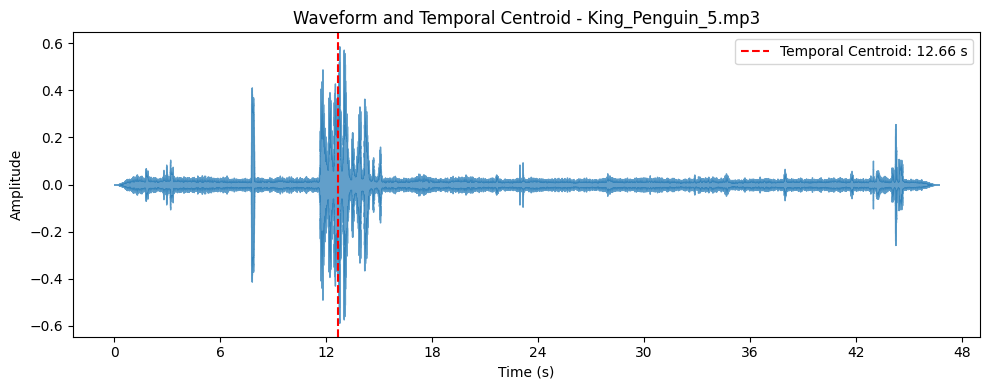

File: King_Penguin_5.mp3, Temporal Centroid: 12.66 seconds


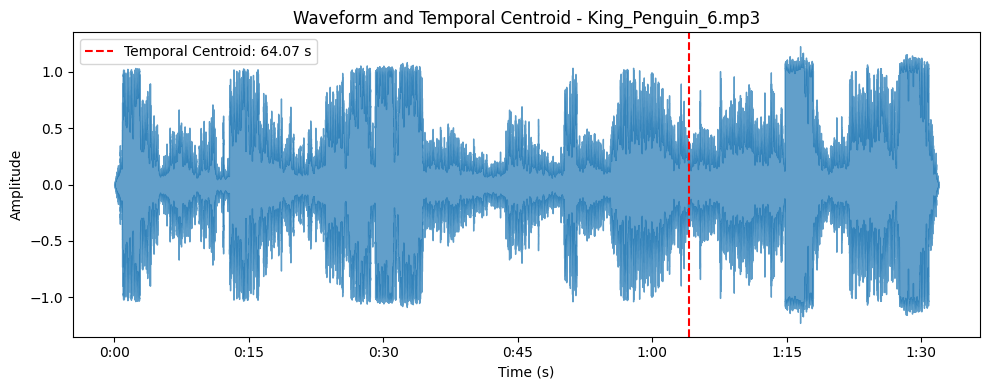

File: King_Penguin_6.mp3, Temporal Centroid: 64.07 seconds


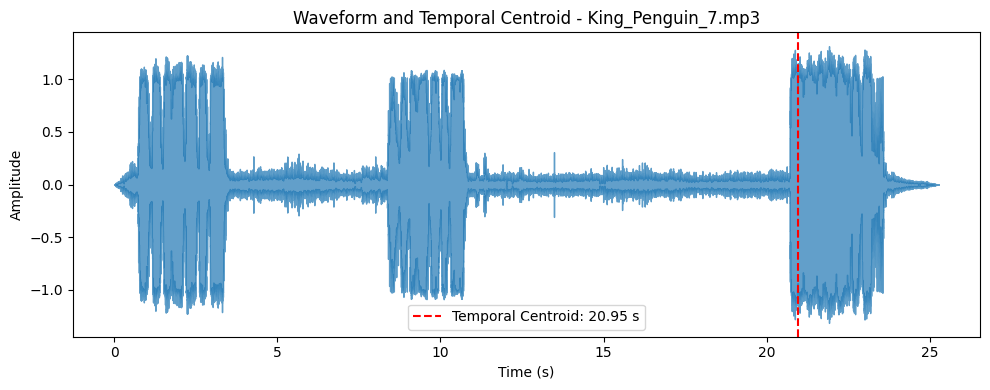

File: King_Penguin_7.mp3, Temporal Centroid: 20.95 seconds


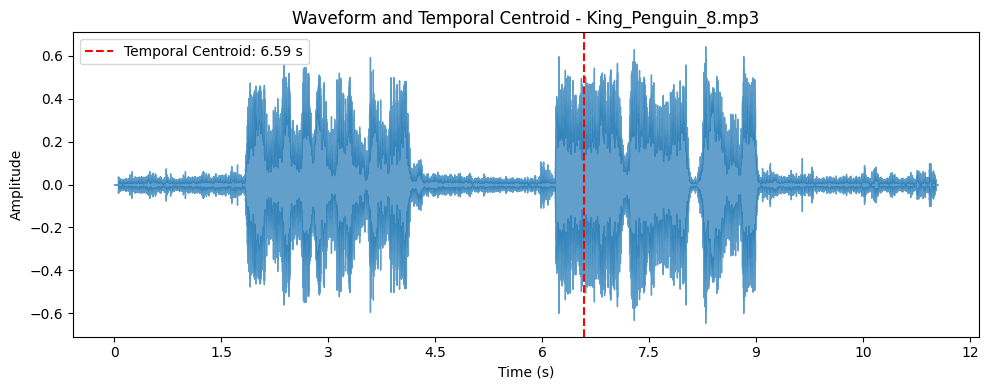

File: King_Penguin_8.mp3, Temporal Centroid: 6.59 seconds


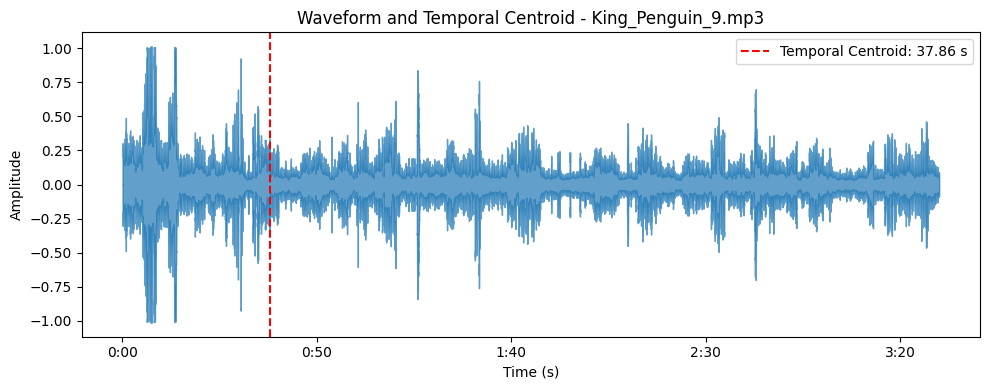

File: King_Penguin_9.mp3, Temporal Centroid: 37.86 seconds


In [2]:
################################################################################
### MY CODE
################################################################################

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to visualize waveforms and compute temporal centroids
def visualize_waveform_and_compute_temporal_centroid(audio_dir):
    """
    Visualize waveforms of audio files in the directory and compute their temporal centroids.
    
    Args:
    - audio_dir (str): Path to the directory containing audio files.
    
    Outputs:
    - Waveform plots and temporal centroid values for each audio file.
    """
    # List all audio files in the directory
    audio_files = [f for f in os.listdir(audio_dir) if f.endswith(".mp3")]

    # Check if there are audio files to process
    if not audio_files:
        print("No audio files found in the directory.")
        return

    # Process each audio file
    for i, audio_file in enumerate(audio_files):
        audio_path = os.path.join(audio_dir, audio_file)
        
        try:
            # Load the audio file
            y, sr = librosa.load(audio_path, sr=None)  # y: audio time series, sr: sampling rate

            # Compute the energy envelope (squared amplitude)
            energy_envelope = np.abs(y)**2
            times = np.linspace(0, len(y) / sr, len(y))  # Time values corresponding to samples

            # Compute cumulative energy (CDF of energy)
            cumulative_energy = np.cumsum(energy_envelope)
            cumulative_energy /= cumulative_energy[-1]  # Normalize CDF to [0, 1]

            # Find the temporal centroid (where cumulative energy ≈ 0.5)
            temporal_centroid_index = np.where(cumulative_energy >= 0.5)[0][0]
            temporal_centroid_time = times[temporal_centroid_index]

            # Plot the waveform
            plt.figure(figsize=(10, 4))
            librosa.display.waveshow(y, sr=sr, alpha=0.7)
            plt.title(f"Waveform and Temporal Centroid - {audio_file}")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            
            # Mark the temporal centroid on the plot
            plt.axvline(temporal_centroid_time, color='r', linestyle='--', label=f"Temporal Centroid: {temporal_centroid_time:.2f} s")
            plt.legend()
            plt.tight_layout()
            plt.show()
            
            # Print the temporal centroid value
            print(f"File: {audio_file}, Temporal Centroid: {temporal_centroid_time:.2f} seconds")
        
        except Exception as e:
            print(f"Error processing {audio_file}: {e}")

# Call the function with the directory containing audio files
audio_directory = "penguin_sounds"  # Update with your directory path
visualize_waveform_and_compute_temporal_centroid(audio_directory)

